In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
snapp1 = []
tapsi1 = []

snapp2 = []
tapsi2 = []

snapp3 = []
tapsi3 = []

In [ ]:
data_frames = {}

date_range_3 = 'since:2022-04-01 until:2022-06-17'
date_range_2 = 'since:2022-02-01 until:2022-03-30'
date_range_1 = 'since:2021-12-01 until:2022-01-30'

date_list = [date_range_1, date_range_2, date_range_3]



tweet_counts = 1000

In [ ]:
def scrape(app_list, date, arg):
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(arg +' '+ date).get_items()):
        if i>tweet_counts:
            break
        app_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.mentionedUsers])
    
    app_df = pd.DataFrame(app_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'mentionedUsers'])
    return app_df
    

In [ ]:
# data cleaning function
def filter_by_text(df, condition):   #function to filter remove rows from given dataframe whose 'text' satisfies 'condition'
    to_remove = []
    for index, row in df.iterrows():
        content = row['Text']
        if condition(content):
            to_remove.append(index)
   
    return df.drop(to_remove, axis=0)

In [ ]:
snapp_df1 = scrape(snapp1, date_range_1, 'snapp_team OR اسنپ')
snapp_df2 = scrape(snapp1, date_range_2, 'snapp_team OR اسنپ')
snapp_df3 = scrape(snapp3, date_range_3, 'snapp_team OR اسنپ')

In [ ]:
snapp_df1 = filter_by_text(snapp_df1, lambda a:('اسنپ چت' in a) or ('اسنپ شات' in a))
snapp_df2 = filter_by_text(snapp_df2, lambda a:('اسنپ چت' in a) or ('اسنپ شات' in a))
snapp_df3 = filter_by_text(snapp_df3, lambda a:('اسنپ چت' in a) or ('اسنپ شات' in a))

In [ ]:
tapsi_df1 = scrape(tapsi1, date_range_1, 'tapsi OR تپسی')
tapsi_df2 = scrape(tapsi1, date_range_2, 'tapsi OR تپسی')
tapsi_df3 = scrape(tapsi3, date_range_3, 'tapsi OR تپسی')

In [ ]:
def create_mentions_dataframe(df):
    new_df = pd.DataFrame(columns=['Username', 'mentionedUsers'])
    for index, row in df.iterrows():
        if type(row['mentionedUsers']) != type(None):
            for user in row['mentionedUsers']:
                new_df = new_df.append({'Username': row['Username'], 'mentionedUsers': user.username}, ignore_index=True)
    return new_df


In [ ]:
snapp_mentions = [create_mentions_dataframe(snapp_df1),
create_mentions_dataframe(snapp_df2),
create_mentions_dataframe(snapp_df3)]

In [ ]:
snapp_mentions[0]

,Username,mentionedUsers
0,positron3030,tahtetaghibam
1,Jeremiahdeamour,positron3030
2,Jeremiahdeamour,tahtetaghibam
3,pardis_bi,faaraaan
4,MrMoham62815811,JaneBasiji_Ga
...,...,...
536,Dizziness2000,coralinejonsss
537,MohammadRezaDx,blue_nillin
538,lepayamm,HastiGhaffari
539,Mahdialayee,Ali_Baniasadii


In [ ]:
# function to sort cenralities, will be used later
def get_sorted(values_list):
    sorted_list = []
    for v in  sorted(values_list, key=values_list.get, reverse=True):
        sorted_list.append((v, values_list[v]))
    return sorted_list  

In [ ]:
def get_top(n, lst):
    return [lst[i] for i in range(0, n)]

### Graphs for snapp

In [ ]:
sg_1 = nx.from_pandas_edgelist(snapp_mentions[0], 'Username', 'mentionedUsers')  
sg_2 = nx.from_pandas_edgelist(snapp_mentions[1], 'Username', 'mentionedUsers')  
sg_3 = nx.from_pandas_edgelist(snapp_mentions[2], 'Username', 'mentionedUsers')  

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

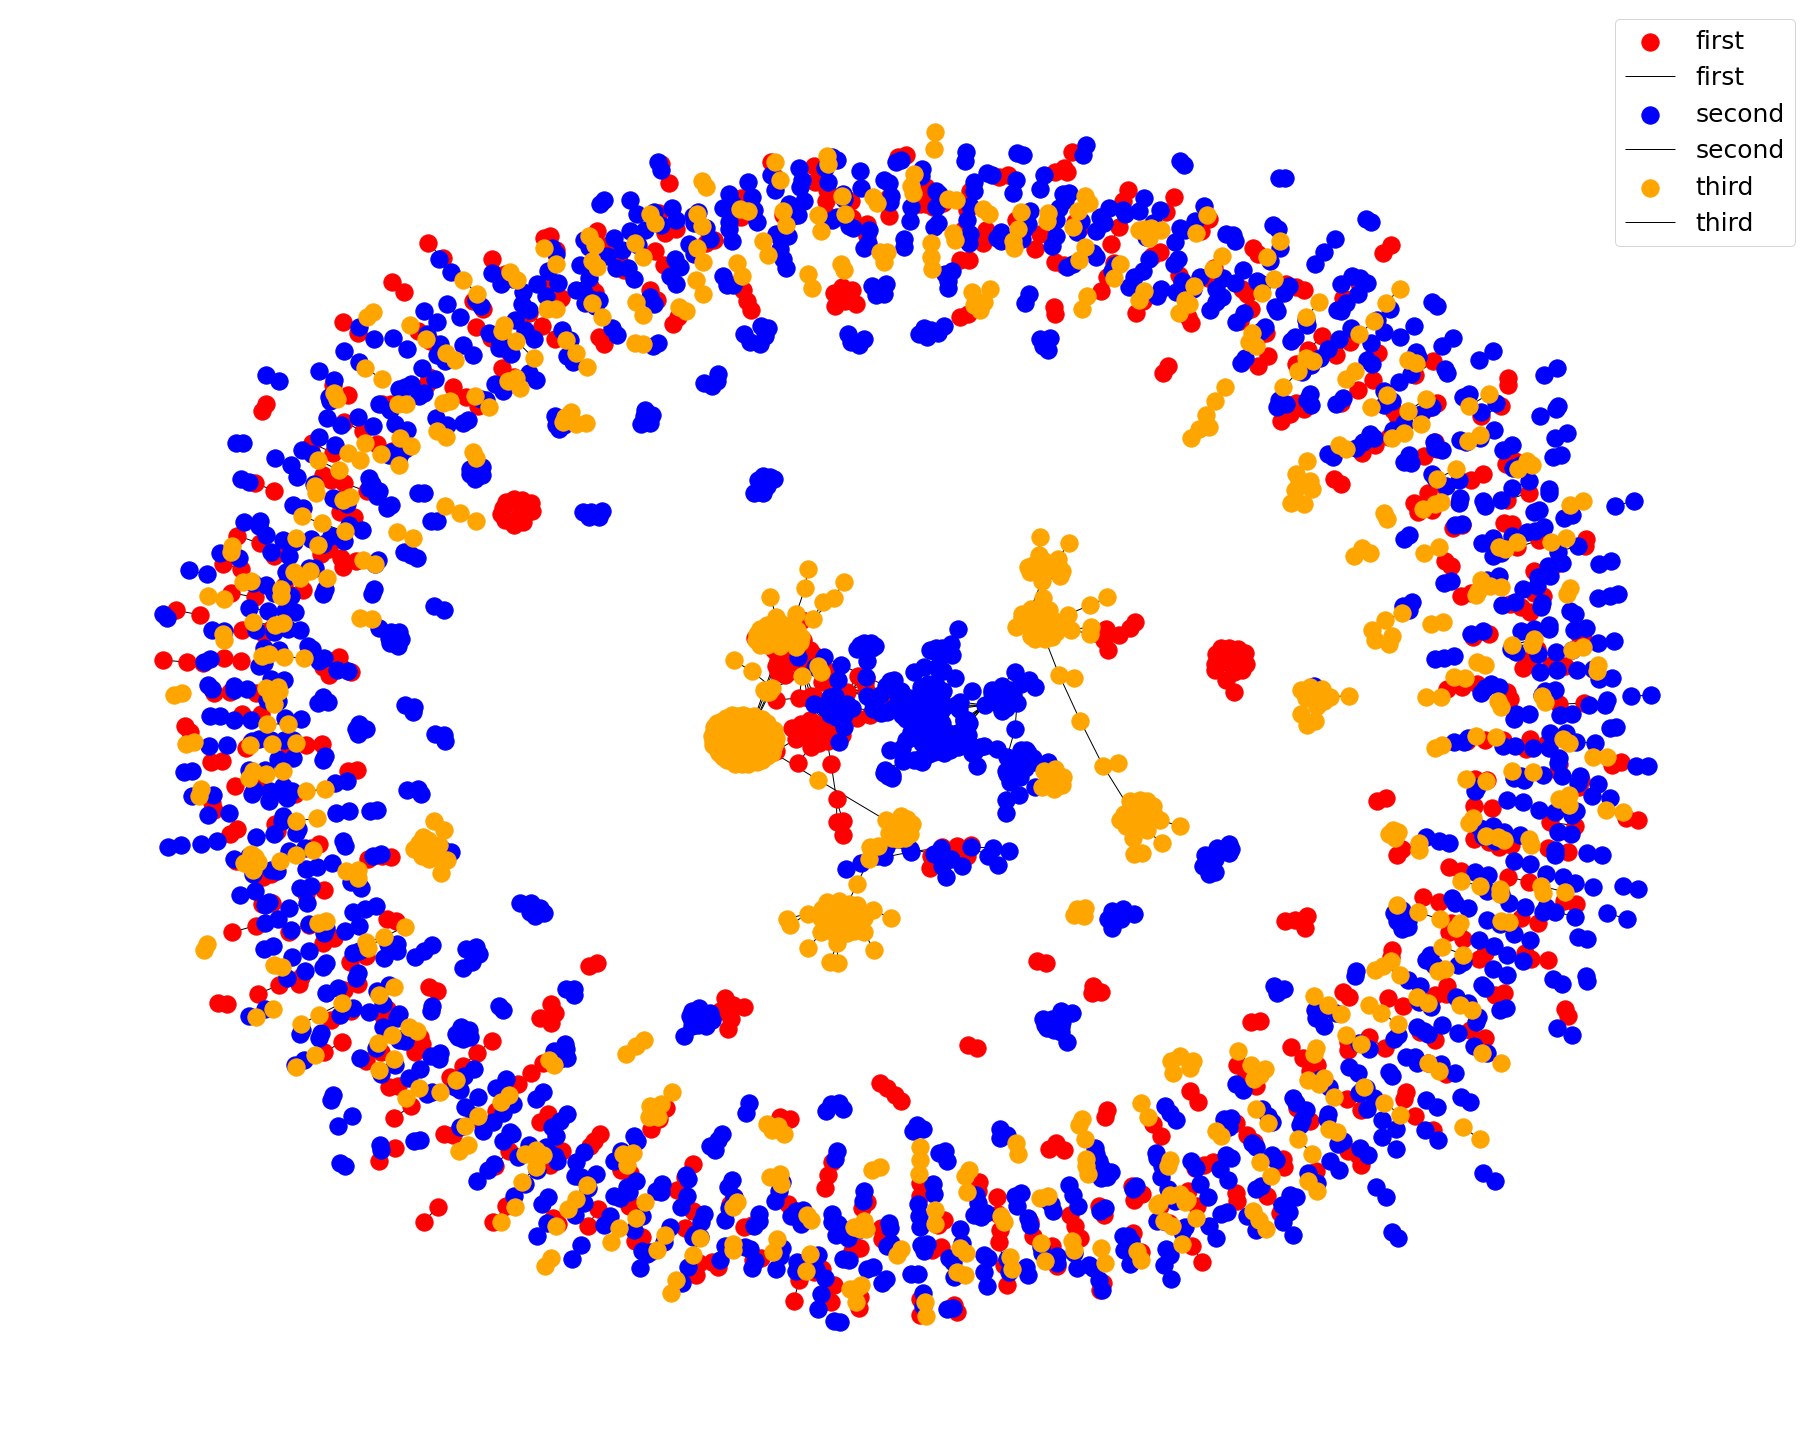

In [ ]:
plt.figure(figsize=(25, 20))
nx.draw(sg_1, node_color= 'red', label='first')
nx.draw(sg_2, node_color= 'blue', label='second')
nx.draw(sg_3, node_color= 'orange', label='third')
plt.legend(prop={'size': 25})
plt.show()

### Centralities for snapp

In [ ]:
s_degree = []
s_eigen = []
s_between = []
s_closeness = []

g_list = [sg_1, sg_2, sg_3]

for i in range(0, len(g_list)):
    s_degree.append( nx.degree_centrality(g_list[i]) )
    s_eigen.append( nx.eigenvector_centrality(g_list[i], max_iter=500) )
    s_between.append( nx.betweenness_centrality(g_list[i]) )
    s_closeness.append( nx.closeness_centrality(g_list[i]) )

In [ ]:
s_sorted_degree = []
s_sorted_eigen = []
s_sorted_between = []
s_sorted_closeness = []
for i in range(0, len(g_list)):
    s_sorted_degree.append( get_sorted(s_degree[i]) )
    s_sorted_eigen.append( get_sorted(s_eigen[i]) )
    s_sorted_between.append( get_sorted(s_between[i]) )
    s_sorted_closeness.append( get_sorted(s_closeness[i]) )

In [ ]:
for i in range(0, 3):
    print('**range number ', str(i+1) ,'**')
    print('degree centrality')
    print(get_top(4, s_sorted_degree[i]), end='\n\n')
    print('eigenvector centrality')
    print(get_top(4, s_sorted_eigen[i]), end='\n\n')
    print('betweenness centrality')
    print(get_top(4, s_sorted_between[i]), end='\n\n')
    print('closeness centrality')
    print(get_top(4, s_sorted_closeness[i]), end='\n\n')
    print('--------------------------', end='\n\n')

**range number  1 **
degree centrality
[('faaraaan', 0.03182374541003671), ('Snapp_Team', 0.03182374541003671), ('SnappSupport', 0.020807833537331698), ('sobhan_70', 0.014687882496940023)]

eigenvector centrality
[('Snapp_Team', 0.5086011255786), ('faaraaan', 0.35859835646946064), ('SnappSupport', 0.3523151263174271), ('snapp_box', 0.14799728771762133)]

betweenness centrality
[('Snapp_Team', 0.004799461604307166), ('faaraaan', 0.0037079703362373102), ('SnappSupport', 0.0023979808161534704), ('snappfood', 0.0010529915760673916)]

closeness centrality
[('Snapp_Team', 0.04319631668112218), ('SnappSupport', 0.03882526082648482), ('Hosseien', 0.037272250393425424), ('babayugaa', 0.0368510950217483)]

--------------------------

**range number  2 **
degree centrality
[('Snapp_Team', 0.037606837606837605), ('snappfood', 0.015384615384615384), ('faaraaan', 0.014814814814814814), ('SnappSupport', 0.014814814814814814)]

eigenvector centrality
[('Snapp_Team', 0.637277747051254), ('SnappSupport'

### Graphs for tapsi

In [ ]:
tapsi_mentions = [create_mentions_dataframe(tapsi_df1),
create_mentions_dataframe(tapsi_df2),
create_mentions_dataframe(tapsi_df3)
]

In [ ]:
tg_1 = nx.from_pandas_edgelist(tapsi_mentions[0], 'Username', 'mentionedUsers')  
tg_2 = nx.from_pandas_edgelist(tapsi_mentions[1], 'Username', 'mentionedUsers')  
tg_3 = nx.from_pandas_edgelist(tapsi_mentions[2], 'Username', 'mentionedUsers')  

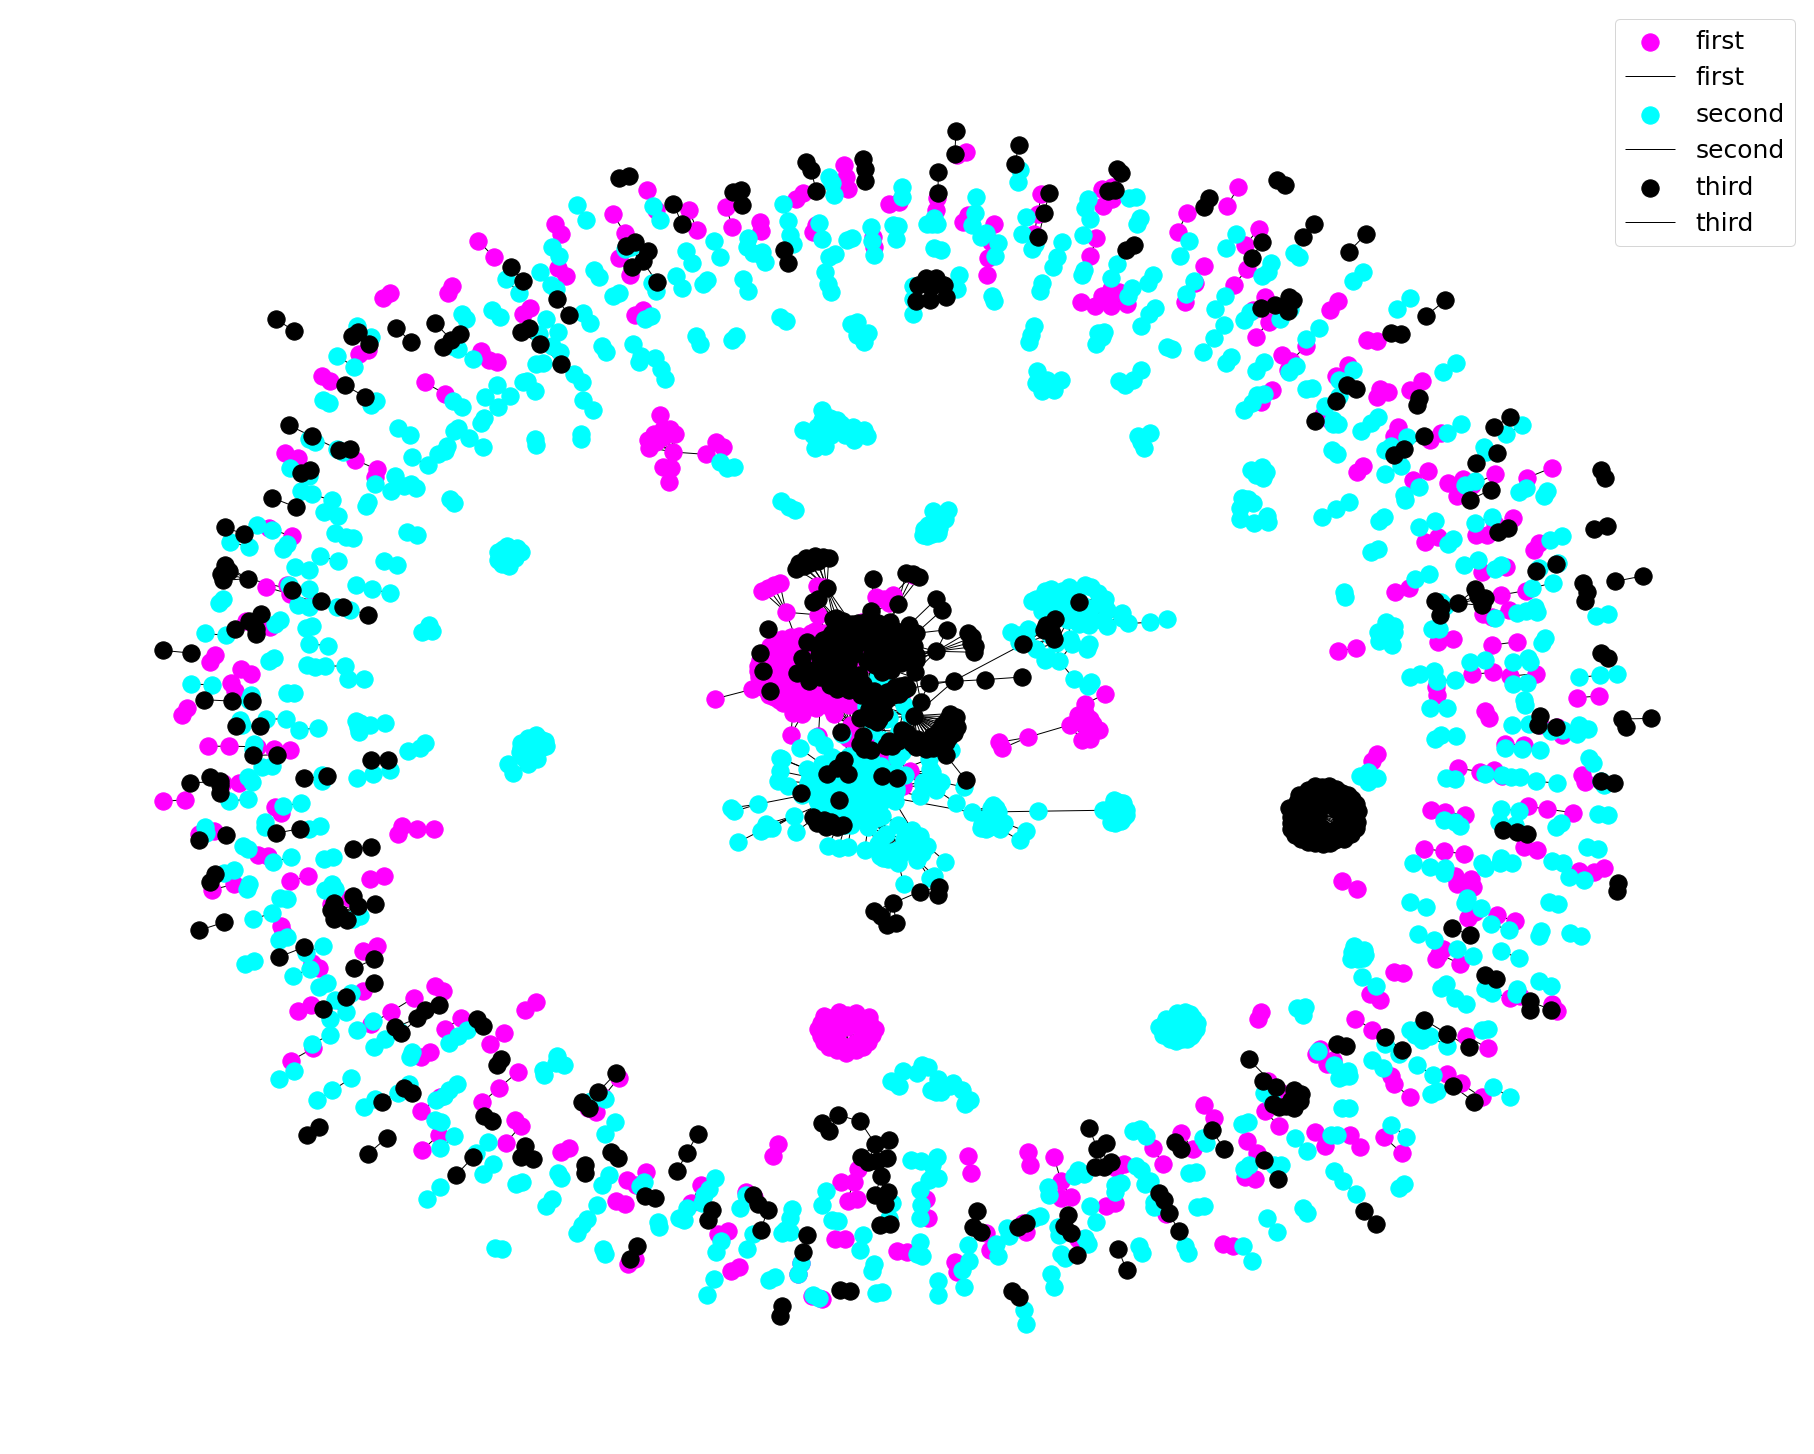

In [ ]:
plt.figure(figsize=(25, 20))
nx.draw(tg_1, node_color= 'magenta', label='first')
nx.draw(tg_2, node_color= 'cyan', label='second')
nx.draw(tg_3, node_color= 'black', label='third')
plt.legend(prop={'size': 25})
plt.show()

### Centralities for tapsi

In [ ]:
t_degree = []
t_eigen = []
t_between = []
t_closeness = []

tg_list = [tg_1, tg_2, tg_3]

for i in range(0, len(tg_list)):
    t_degree.append( nx.degree_centrality(tg_list[i]) )
    t_eigen.append( nx.eigenvector_centrality(tg_list[i], max_iter=500) )
    t_between.append( nx.betweenness_centrality(tg_list[i]) )
    t_closeness.append( nx.closeness_centrality(tg_list[i]) )

In [ ]:
t_sorted_degree = []
t_sorted_eigen = []
t_sorted_between = []
t_sorted_closeness = []
for i in range(0, len(tg_list)):
    t_sorted_degree.append( get_sorted(t_degree[i]) )
    t_sorted_eigen.append( get_sorted(t_eigen[i]) )
    t_sorted_between.append( get_sorted(t_between[i]) )
    t_sorted_closeness.append( get_sorted(t_closeness[i]) )

In [ ]:
for i in range(0, 3):
    print('**range number ', str(i+1) ,'**')
    print('degree centrality')
    print(get_top(4, t_sorted_degree[i]), end='\n\n')
    print('eigenvector centrality')
    print(get_top(4, t_sorted_eigen[i]), end='\n\n')
    print('betweenness centrality')
    print(get_top(4, t_sorted_between[i]), end='\n\n')
    print('closeness centrality')
    print(get_top(4, t_sorted_closeness[i]), end='\n\n')
    print('--------------------------', end='\n\n')

**range number  1 **
degree centrality
[('Tapsi_ir', 0.2198697068403909), ('haven_fics', 0.04723127035830619), ('Tapsi_Support', 0.027687296416938113), ('Mowhadese', 0.021172638436482087)]

eigenvector centrality
[('Tapsi_ir', 0.6799821015919011), ('Mowhadese', 0.12495138989568505), ('YeganehKhodami', 0.11783159900001214), ('Tapsi_Support', 0.11541048891072755)]

betweenness centrality
[('Tapsi_ir', 0.06982834814984068), ('Tapsi_Support', 0.009042231916864606), ('faaraaan', 0.004298824067038275), ('ataeiniya', 0.003778076528633144)]

closeness centrality
[('Tapsi_ir', 0.22108117648946585), ('Tapsi_Support', 0.13317352767763077), ('Mowhadese', 0.13122654627883498), ('YeganehKhodami', 0.12970947637965768)]

--------------------------

**range number  2 **
degree centrality
[('Tapsi_ir', 0.14636015325670498), ('Tapsi_Support', 0.023754789272030653), ('haven_fics', 0.022222222222222223), ('Snapp_Team', 0.015325670498084292)]

eigenvector centrality
[('Tapsi_ir', 0.6849792415274234), ('Taps

In [ ]:
def avg_degree(graph):
    degrees = [node_degree[1] for node_degree in  graph.degree]
    return round(sum(degrees) / len(degrees), 3)  

### graph properties for each

#### snapp

In [ ]:
print('*** number of edges (conversations)')
print('first span:', sg_1.number_of_edges())
print('second span:', sg_2.number_of_edges())
print('third span:', sg_3.number_of_edges(),  end='\n\n')

print('*** number of nodes (actors)')
print('first span:', sg_1.number_of_nodes())
print('second span:', sg_2.number_of_nodes())
print('third span:', sg_3.number_of_nodes(), end='\n\n')

#The higher the average degree value, the better because each
#actor in the network has many relationships so that it will expand the spread of information
print('*** average degree ***')
print('first span:',avg_degree(sg_1))
print('second span:', avg_degree(sg_2))
print('third span:', avg_degree(sg_3), end='\n\n')


*** number of edges (conversations)
first span: 543
second span: 1253
third span: 707

*** number of nodes (actors)
first span: 818
second span: 1756
third span: 948

*** average degree ***
first span: 1.328
second span: 1.427
third span: 1.492



#### tapsi

In [ ]:
print('*** number of edges (conversations)')
print('first span:', tg_1.number_of_edges())
print('second span:', tg_2.number_of_edges())
print('third span:', tg_3.number_of_edges(),  end='\n\n')

print('*** number of nodes (actors)')
print('first span:', tg_1.number_of_nodes())
print('second span:', tg_2.number_of_nodes())
print('third span:', tg_3.number_of_nodes(), end='\n\n')

#The higher the average degree value, the better because each
#actor in the network has many relationships so that it will expand the spread of information
print('*** average degree ***')
print('first span:',avg_degree(tg_1))
print('second span:', avg_degree(tg_2))
print('third span:', avg_degree(tg_3), end='\n\n')


*** number of edges (conversations)
first span: 523
second span: 1128
third span: 600

*** number of nodes (actors)
first span: 615
second span: 1306
third span: 613

*** average degree ***
first span: 1.701
second span: 1.727
third span: 1.958



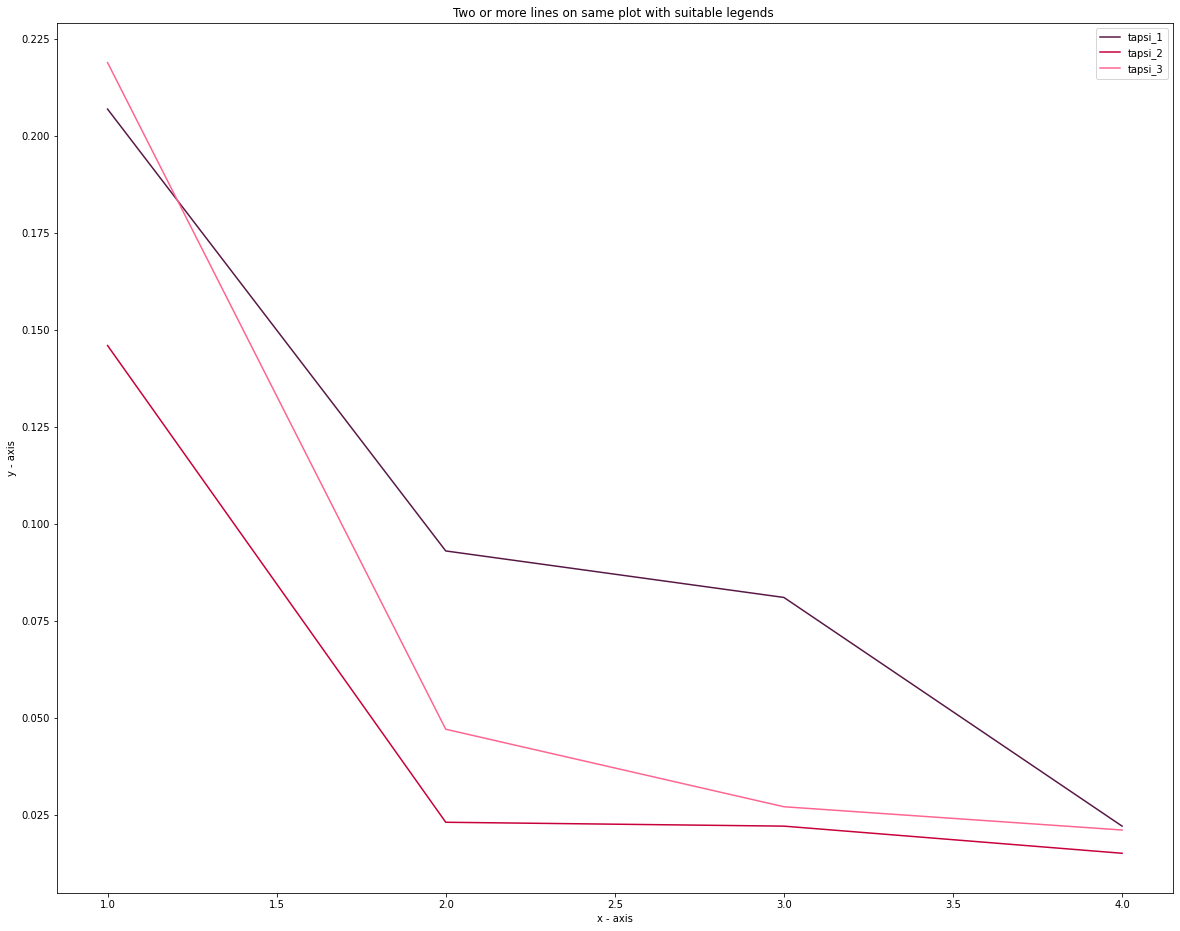

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))

x = [1,2,3,4]

y1 = [0.207, 0.093, 0.081, 0.022]
plt.plot(x, y1, label = "tapsi_1", color = '#581845')

y2 = [0.146, 0.023, 0.022, 0.015	]
plt.plot(x, y2, label = "tapsi_2", color = '#C70039')

y2 = [0.219, 0.047, 0.027, 0.021]
plt.plot(x, y2, label = "tapsi_3", color = '#fe6591' )



plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

### save data frames

In [ ]:
import os

In [ ]:
snapp_dfs = [snapp_df1, snapp_df2, snapp_df3]

for i in range(0, len(snapp_dfs)):
    snapp_dfs[i].to_csv('pattern_data/snapp/date_'+str(i+1)+'.csv')

In [ ]:
tapsi_dfs = [tapsi_df1, tapsi_df2, tapsi_df3]

for i in range(0, len(tapsi_dfs)):
    tapsi_dfs[i].to_csv('pattern_data/tapsi/date_'+str(i+1)+'.csv')